In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from algo_sample import *
from algo_tom import *
from algo_utils import *

# show float in two decimal form
plt.style.use('ggplot')
pd.set_option('display.float_format',lambda x : '%.2f' % x)

In [2]:
vic = pd.read_csv("../../data/vic_train.csv")
vic = vic.loc[1:].reset_index(drop=True)
vic['time'] = vic['time'].astype('datetime64[ns]')
vic['year'] = vic['time'].dt.year
#vic.index = vic.time
#vic = vic.drop(columns='time')
spot_price = vic.spot_price

vic_cv = pd.read_csv("../../data/vic_cv.csv")
vic_cv = vic_cv.loc[1:].reset_index(drop=True)
vic_cv['time'] = vic_cv['time'].astype('datetime64[ns]')
vic_cv['year'] = vic_cv['time'].dt.year
#vic_cv.index = vic_cv.time
#vic_cv = vic_cv.drop(columns='time')
spot_price_cv = vic_cv.spot_price

vic_test = pd.read_csv("../../data/vic_test.csv")
vic_test = vic_test.loc[1:].reset_index(drop=True)
vic_test['time'] = vic_test['time'].astype('datetime64[ns]')
vic_test['year'] = vic_test['time'].dt.year
#vic_test.index = vic_test.time
#vic_test = vic_test.drop(columns='time')
spot_price_test = vic_test.spot_price

vic.head()

,time,spot_price,inter_gen,demand,period,year
0,2018-01-01 00:30:00,92.46,131.68,4398,2,2018
1,2018-01-01 01:00:00,87.62,119.98,4238,3,2018
2,2018-01-01 01:30:00,73.08,123.86,4112,4,2018
3,2018-01-01 02:00:00,70.18,132.72,3956,5,2018
4,2018-01-01 02:30:00,67.43,120.73,3833,6,2018


## Overview of algorithm performance

In [5]:
# Algorithm 1
df = compute_algo_1(spot_price)
df['year'] = vic.time.dt.year
print('=== Algorithm 1 ===')
print(df.groupby('year').market_revenue.sum())
print('Train Revenue:', df.market_revenue.sum())
df = compute_algo_1(spot_price_cv)
print('CV Revenue:', df.market_revenue.sum())
df = compute_algo_1(spot_price_test)
print('Test Revenue:', df.market_revenue.sum(), '\n')


# Algorithm 3
df = compute_algo_3(spot_price, method=2)
df['year'] = vic.time.dt.year
print('=== Algorithm 3 ===')
print(df.groupby('year').market_revenue.sum())
print('Train Revenue:', df.market_revenue.sum())
df = compute_algo_3(spot_price_cv, method=2)
print('CV Revenue:', df.market_revenue.sum())
df = compute_algo_3(spot_price_test, method=2)
print('Test Revenue:', df.market_revenue.sum(), '\n')


# Algo Test Tom 1 (with forecast filtered and optimized dispatch)
forecast = calc_forecast_tom_1(spot_price)
forecast = filter_forecast(spot_price, forecast)
market_dispatch = optimize_dispatch(spot_price, forecast)
df = pd.DataFrame({'spot_price': spot_price, 'market_dispatch': market_dispatch, 'forecast': forecast})
df['market_revenue'] = calc_market_revenue(df.market_dispatch, df.spot_price)
df['year'] = vic.time.dt.year
print('=== Algorithm Test Tom 1 (with forecast filtered & optimized dispatch) ===')
print(df.groupby('year').market_revenue.sum())
print('Train Revenue:', df.market_revenue.sum())
forecast = calc_forecast_tom_1(spot_price_cv)
forecast = filter_forecast(spot_price_cv, forecast)
market_dispatch = optimize_dispatch(spot_price_cv, forecast)
df = pd.DataFrame({'spot_price': spot_price_cv, 'market_dispatch': market_dispatch})
df['market_revenue'] = calc_market_revenue(df.market_dispatch, df.spot_price)
print('CV Revenue:', df.market_revenue.sum())
forecast = calc_forecast_tom_1(spot_price_test)
forecast = filter_forecast(spot_price_test, forecast)
market_dispatch = optimize_dispatch(spot_price_test, forecast)
df = pd.DataFrame({'spot_price': spot_price_test, 'market_dispatch': market_dispatch})
df['market_revenue'] = calc_market_revenue(df.market_dispatch, df.spot_price)
print('Test Revenue:', df.market_revenue.sum(), '\n')


# Algo Test Tom 1 (opimized dispatch ONLY)
forecast = calc_forecast_tom_1(spot_price)
market_dispatch = optimize_dispatch(spot_price, forecast)
df = pd.DataFrame({'spot_price': spot_price, 'market_dispatch': market_dispatch})
df['market_revenue'] = calc_market_revenue(df.market_dispatch, df.spot_price)
df['year'] = vic.time.dt.year
print('=== Algorithm Test Tom 1 (opimized dispatch ONLY)===')
print(df.groupby('year').market_revenue.sum())
print('Train Revenue:', df.market_revenue.sum())
forecast = calc_forecast_tom_1(spot_price_cv)
market_dispatch = optimize_dispatch(spot_price_cv, forecast)
df = pd.DataFrame({'spot_price': spot_price_cv, 'market_dispatch': market_dispatch})
df['market_revenue'] = calc_market_revenue(df.market_dispatch, df.spot_price)
print('CV Revenue:', df.market_revenue.sum())
forecast = calc_forecast_tom_1(spot_price_test)
market_dispatch = optimize_dispatch(spot_price_test, forecast)
df = pd.DataFrame({'spot_price': spot_price_test, 'market_dispatch': market_dispatch})
df['market_revenue'] = calc_market_revenue(df.market_dispatch, df.spot_price)
print('Test Revenue:', df.market_revenue.sum(), '\n')


# Algo Test Tom 2 (with forecast filtered & optimized dispatch)
forecast = calc_forecast_tom_2(spot_price)
forecast = filter_forecast(spot_price, forecast)
market_dispatch = optimize_dispatch(spot_price, forecast)
df = pd.DataFrame({'spot_price': spot_price, 'market_dispatch': market_dispatch})
df['market_revenue'] = calc_market_revenue(df.market_dispatch, df.spot_price)
df['year'] = vic.time.dt.year
print('=== Algorithm Test Tom 2 (with forecast filtered & optimized dispatch) ===')
print(df.groupby('year').market_revenue.sum())
print('Train Revenue:', df.market_revenue.sum())
forecast = calc_forecast_tom_2(spot_price_cv)
forecast = filter_forecast(spot_price_cv, forecast)
market_dispatch = optimize_dispatch(spot_price_cv, forecast)
df = pd.DataFrame({'spot_price': spot_price_cv, 'market_dispatch': market_dispatch})
df['market_revenue'] = calc_market_revenue(df.market_dispatch, df.spot_price)
print('CV Revenue:', df.market_revenue.sum())
forecast = calc_forecast_tom_2(spot_price_test)
forecast = filter_forecast(spot_price_test, forecast)
market_dispatch = optimize_dispatch(spot_price_test, forecast)
df = pd.DataFrame({'spot_price': spot_price_test, 'market_dispatch': market_dispatch})
df['market_revenue'] = calc_market_revenue(df.market_dispatch, df.spot_price)
print('Test Revenue:', df.market_revenue.sum(), '\n')

# Algo Test Tom 2 (optimized dispatch ONLY)
# train
forecast = calc_forecast_tom_2(spot_price)
market_dispatch = optimize_dispatch(spot_price, forecast)
df = pd.DataFrame({'spot_price': spot_price, 'market_dispatch': market_dispatch})
df['market_revenue'] = calc_market_revenue(df.market_dispatch, df.spot_price)
df['year'] = vic.time.dt.year
print('=== Algorithm Test Tom 2 (with opimized dispatch ONLY) ===')
print(df.groupby('year').market_revenue.sum())
print('Train Revenue:', df.market_revenue.sum())
# cv
forecast = calc_forecast_tom_2(spot_price_cv)
a = pd.DataFrame({'forecast': forecast, 'spot_price': spot_price_cv})
a[(a.forecast > 0) & (a.spot_price < 0)].forecast = 0
forecast = a.forecast
forecast = filter_forecast(spot_price_cv, forecast)
market_dispatch = optimize_dispatch(spot_price_cv, forecast)
df = pd.DataFrame({'spot_price': spot_price_cv, 'market_dispatch': market_dispatch})
df['market_revenue'] = calc_market_revenue(df.market_dispatch, df.spot_price)
print('CV Revenue:', df.market_revenue.sum())
# test
forecast = calc_forecast_tom_2(spot_price_test)
a = pd.DataFrame({'forecast': forecast, 'spot_price': spot_price_test})
a[(a.forecast > 0) & (a.spot_price < 0)].forecast = 0
forecast = a.forecast
forecast = filter_forecast(spot_price_test, forecast)
market_dispatch = optimize_dispatch(spot_price_test, forecast)
df = pd.DataFrame({'spot_price': spot_price_test, 'market_dispatch': market_dispatch})
df['market_revenue'] = calc_market_revenue(df.market_dispatch, df.spot_price)
print('Test Revenue:', df.market_revenue.sum(), '\n')

=== Algorithm 1 ===
year
2018   11563507.00
2019    8602680.00
2020    5026086.00
Name: market_revenue, dtype: float64
Train Revenue: 25192273.0
CV Revenue: 8166895.0
Test Revenue: 1492802.0 

=== Algorithm 3 ===
year
2018   28747496.00
2019   39773718.00
2020   27156801.00
Name: market_revenue, dtype: float64
Train Revenue: 95678015.0
CV Revenue: 16328298.0
Test Revenue: 5311042.0 

=== Algorithm Test Tom 1 (with forecast filtered & optimized dispatch) ===
year
2018   31053997.00
2019   42053355.00
2020   28940706.00
Name: market_revenue, dtype: float64
Train Revenue: 102048058.0
CV Revenue: 16918543.0
Test Revenue: 5552888.0 

=== Algorithm Test Tom 1 (opimized dispatch ONLY)===
year
2018   31053997.00
2019   42053355.00
2020   28940706.00
Name: market_revenue, dtype: float64
Train Revenue: 102048058.0
CV Revenue: 16918543.0
Test Revenue: 5552888.0 

=== Algorithm Test Tom 2 (with forecast filtered & optimized dispatch) ===
year
2018   31508417.00
2019   42306862.00
2020   29157706.0

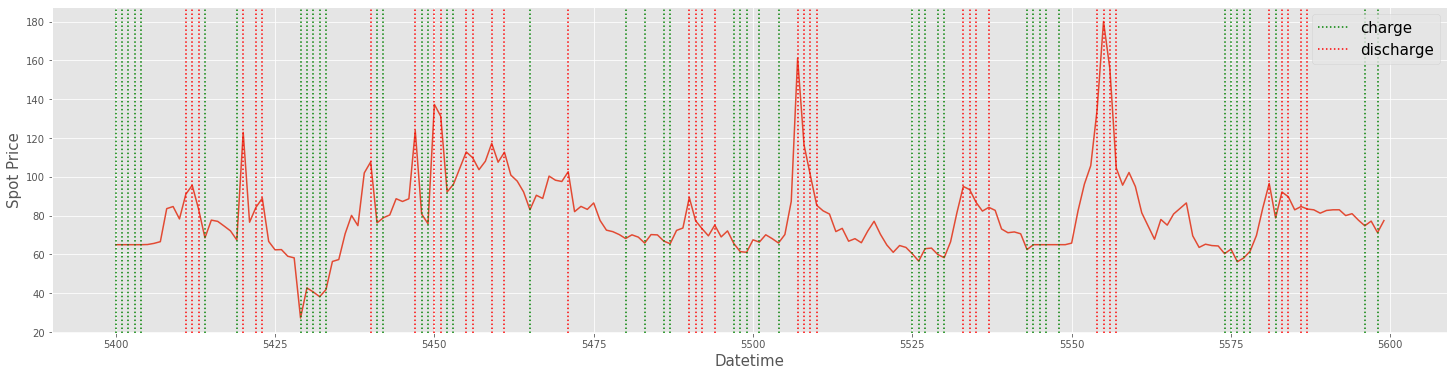

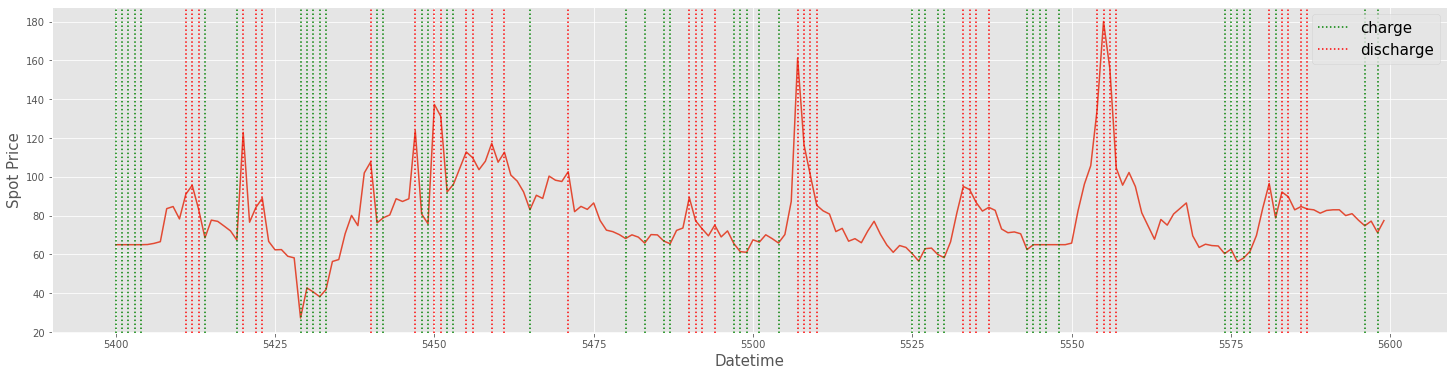

In [10]:
start = 5400
end = 5600
forecast = calc_forecast_tom_2(spot_price)
forecast = filter_forecast(spot_price, forecast)
forecast = optimize_combination(spot_price, forecast)
df = compute_algo(spot_price, forecast)
plot_actions(spot_price, df.market_dispatch, start=start, end=end)
forecast = calc_forecast_tom_2(spot_price)
forecast = filter_forecast(spot_price, forecast)
market_dispatch, forecast = optimize_dispatch(spot_price, forecast)
plot_actions(spot_price, market_dispatch, start=start, end=end)

## Tuning for Algo Tom 1 (with forecast filtered)

In [11]:
small = [13, 0.23, 0.83]     # [6, 0.05, 0.9]
medium = [13, 0.23, 0.83]  # [12, 0.20, 0.80]
large = [13, 0.23, 0.83]   # [24, 0.05, 0.90]

# Train set
df = vic.copy(deep=False)[['time', 'spot_price', 'period', 'year']]
df['forecast'] = calc_forecast_tom_1(df.spot_price, small, medium, large)
df['market_dispatch'] = optimize_dispatch(df.spot_price, df.forecast)
df['market_revenue'] = calc_market_revenue(df.market_dispatch, df.spot_price)
#df.to_csv('algo1.csv')
print('=== Algorithm Test Tom 1 (with forecast filtered) Train set ===')
print(df.groupby('year').market_revenue.sum())
print('TRAIN Revenue:', df.market_revenue.sum(), '\n')

# CV set
df = vic_cv.copy(deep=False)[['time', 'spot_price', 'period', 'year']]
df['forecast'] = calc_forecast_tom_1(df.spot_price, small, medium, large)
df['forecast'] = filter_forecast(df.spot_price, df.forecast)
df['year'] = vic_cv.year
df['market_dispatch'] = optimize_dispatch(df.spot_price, df.forecast)
df['market_revenue'] = calc_market_revenue(df.market_dispatch, df.spot_price)
print('=== Algorithm Test Tom 1 (with forecast filtered) CV set ===')
print(df.groupby('year').market_revenue.sum())
print('CV Revenue:', df.market_revenue.sum(), '\n')

=== Algorithm Test Tom 1 (with forecast filtered) Train set ===
year
2018   30717632.00
2019   41650330.00
2020   28319376.00
Name: market_revenue, dtype: float64
TRAIN Revenue: 100687338.0 

=== Algorithm Test Tom 1 (with forecast filtered) CV set ===
year
2021   16384003.00
Name: market_revenue, dtype: float64
CV Revenue: 16384003.0 



## Tuning for Algo Tom 2

In [7]:
spot_price = vic.spot_price

df = pd.DataFrame(spot_price, columns=['spot_price']).reset_index(drop=True)
    
# signal using percentile
medium=[12, 0.35, 0.65]
window_m = medium[0]
lower_pctl_m = medium[1]
upper_pctl_m = medium[2]
df['lower_m'] = df.spot_price[::-1].shift(1).rolling(window_m*2+1, center=True, min_periods=1).quantile(lower_pctl_m)
df['upper_m'] = df.spot_price[::-1].shift(1).rolling(window_m, min_periods=1).quantile(upper_pctl_m) 
df['signal_m'] = np.where((df.spot_price <= df.lower_m), -1, np.where(
                            (df.spot_price >= df.upper_m), 1,
                            0))
# Vote 
#df['forecast'] = np.sign(df.forecast_m + df.forecast_s + df.spike1 + df.spike2)
df['forecast'] = np.sign(df.signal_m)

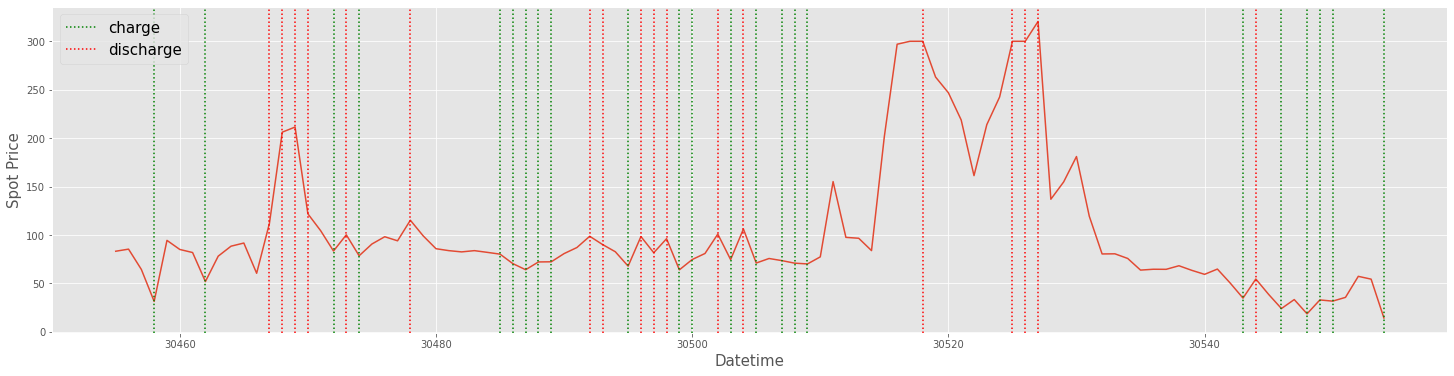

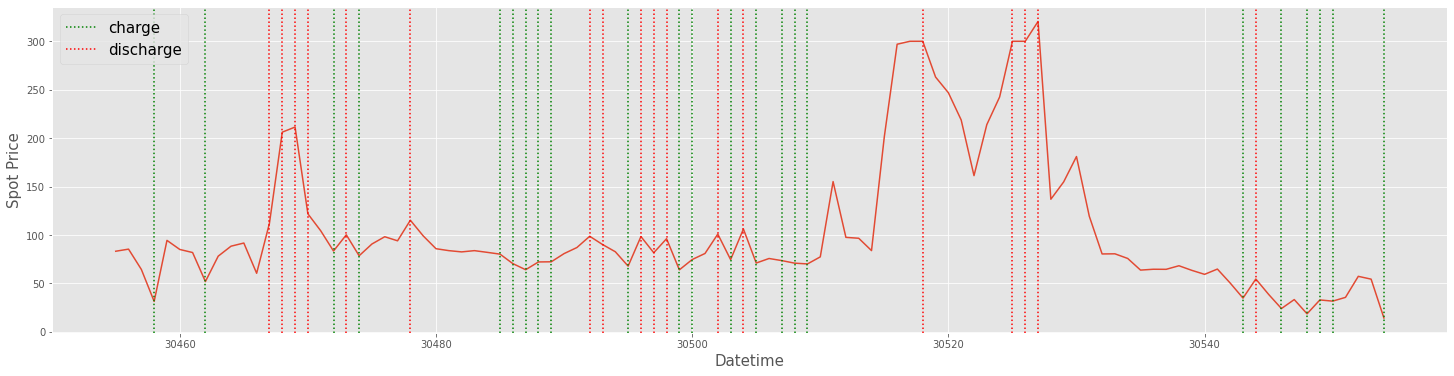

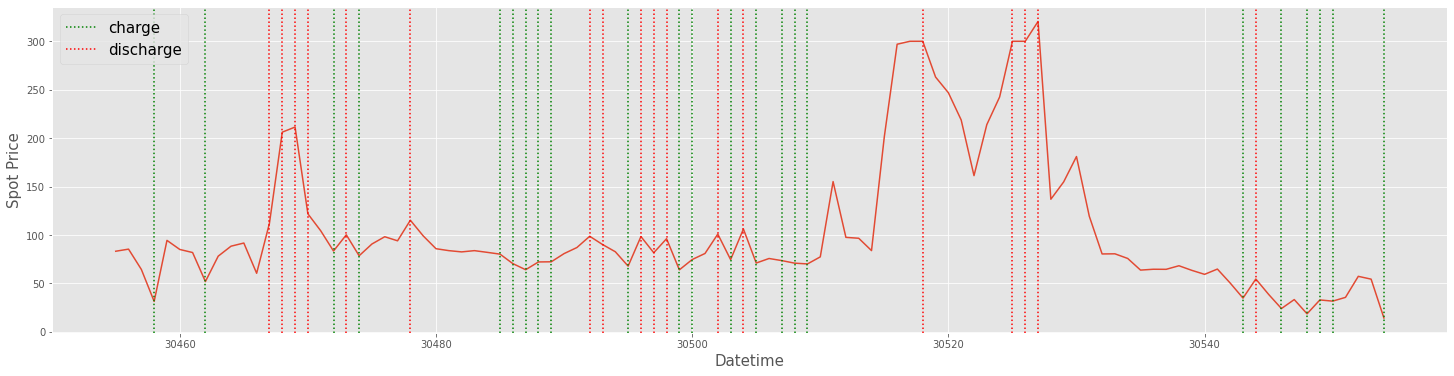

Total market revenue: 101872025


In [11]:
start = 30455  #12500
end =30555 #12650
plot_actions(df.spot_price, df.forecast, start=start, end=end)
df.forecast = filter_forecast(df.spot_price, df.forecast)
df = compute_algo(df.spot_price, df.forecast)
plot_actions(df.spot_price, df.forecast, start=start, end=end)
market_dispatch, forecast = optimize_dispatch(df.spot_price, df.forecast)
df = pd.DataFrame({'spot_price': df.spot_price, 'market_dispatch': market_dispatch, 'forecast': forecast})
df['market_revenue'] = 0
for index, row in df.iterrows():
    df.market_revenue[index] = calc_market_revenue(row.market_dispatch, row.spot_price)
plot_actions(df.spot_price, df.market_dispatch, start=start, end=end)
print('Total market revenue:', df.market_revenue.sum())